In [1]:
from warnings import filterwarnings

In [2]:
filterwarnings("ignore")

In [3]:
import pandas as pd


In [4]:
A=pd.read_csv("C:/Users/Suja4/OneDrive/Documents/Data Science/Dataset/Cars93.csv")

In [5]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

# Removing discrete columns

In [6]:
A.nunique()

id                    93
Manufacturer          32
Model                 93
Type                   6
Min.Price             79
Price                 81
Max.Price             79
MPG.city              21
MPG.highway           22
AirBags                3
DriveTrain             3
Cylinders              6
EngineSize            26
Horsepower            57
RPM                   24
Rev.per.mile          78
Man.trans.avail        2
Fuel.tank.capacity    38
Passengers             6
Length                51
Wheelbase             27
Width                 16
Turn.circle           14
Rear.seat.room        24
Luggage.room          16
Weight                81
Origin                 2
Make                  93
dtype: int64

In [7]:
A=A.drop(labels=["id","Make","Model"],axis=1)

# Missing Data TReatment

In [8]:
A.isna().sum()

Manufacturer           0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
dtype: int64

In [9]:
for i in A.columns:
    if (A[i].dtype=="object"):
        t=A[i].mode()[0]
        A[i]=A[i].fillna(t)
    else:
        t=A[i].mean()
        A[i]=A[i].fillna(t)

In [10]:
A.isna().sum()

Manufacturer          0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
dtype: int64

# outliers removal

In [11]:
cat=[]
con=[]
for i in A.columns:
    if (A[i].dtype=="object"):
        cat.append(i)
    else:
        con.append(i)

In [12]:
cat

['Manufacturer',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin']

In [13]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
ss=StandardScaler()

In [16]:
x1=pd.DataFrame(ss.fit_transform(A[con]),columns=con)


In [17]:
x1

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,-0.083243,-0.427186,-0.286932,-0.366184,-0.610436,-0.452197,-1.033015,-0.627055
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,-0.083243,0.812171,1.629649,0.431983,-0.298510,0.738090,0.396643,0.830208
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,-0.083243,-0.220626,-0.286932,-0.632239,-0.610436,0.057926,0.039228,0.514894
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,0.884457,0.674465,0.302785,0.165927,-0.610436,1.078172,1.111472,0.566026
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,-1.050944,0.192493,0.745073,-0.100128,0.013416,-0.282156,-0.318186,0.966560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,-0.060445,0.019810,0.073018,-0.959938,-1.524806,-0.162577,-0.668585,-1.315292,1.180155,1.359872,1.852158,0.261346,1.629649,0.698038,-0.298510,2.098419,0.000000,1.511968
89,0.054512,0.051036,0.045673,-0.244313,0.172352,-0.647181,-0.188665,0.875050,0.714407,0.562740,-0.083243,-0.220626,-0.139503,-0.632239,-1.234288,1.248213,0.039228,-0.149822
90,0.663786,0.394523,0.164167,-0.781032,-0.770514,0.128186,0.655993,0.875050,0.106911,0.562740,-1.050944,-1.666543,-1.024079,-0.898295,-0.922362,-0.622238,0.396643,-0.448092
91,0.537333,0.332071,0.145937,-0.244313,-0.204794,-0.356418,-0.572601,0.201098,-0.237337,-0.265051,-0.083243,0.467905,0.007926,-0.632239,-0.610436,0.568049,0.039228,-0.149822


In [18]:
outliers=[]
for i in x1.columns:
     outliers.extend(x1[(x1[i]<-3)|(x1[i]>3)].index)

In [19]:
outliers

[47, 58, 58, 58, 38, 41, 38, 41, 16, 59]

In [20]:
from numpy import unique

In [21]:
out=unique(outliers)

In [22]:
out

array([16, 38, 41, 47, 58, 59])

In [23]:
A=A.drop(index=out,axis=0)

In [24]:
A

,Manufacturer,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Acura,Small,12.9,15.9,18.8,25,31,None,Front,4,...,13.2,5,177,102,68,37,26.5,11.000000,2705,non-USA
1,Acura,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,...,18.0,5,195,115,71,38,30.0,15.000000,3560,non-USA
2,Audi,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,...,16.9,5,180,102,67,37,28.0,14.000000,3375,non-USA
3,Audi,Midsize,30.8,37.7,44.6,19,26,Driver only,Front,6,...,21.1,6,193,106,70,37,31.0,17.000000,3405,non-USA
4,BMW,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,...,21.1,4,186,109,69,39,27.0,13.000000,3640,non-USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Van,16.6,19.7,22.7,17,21,None,Front,5,...,21.1,7,187,115,72,38,34.0,13.890244,3960,non-USA
89,Volkswagen,Compact,17.6,20.0,22.4,21,30,None,Front,4,...,18.5,5,180,103,67,35,31.5,14.000000,2985,non-USA
90,Volkswagen,Sporty,22.9,23.3,23.7,18,25,None,Front,6,...,18.5,4,159,97,66,36,26.0,15.000000,2810,non-USA
91,Volvo,Compact,21.8,22.7,23.5,21,28,Driver only,Rear,4,...,15.8,5,190,104,67,37,29.5,14.000000,2985,non-USA


In [25]:
A.index=range(0,87)

# EDA

In [26]:
A.skew()

Min.Price             0.906040
Price                 0.785229
Max.Price             0.727235
MPG.city              1.047579
MPG.highway           0.641205
EngineSize            0.969139
Horsepower            1.010103
RPM                  -0.142996
Rev.per.mile          0.104587
Fuel.tank.capacity   -0.192355
Passengers           -0.187937
Length               -0.036246
Wheelbase             0.160709
Width                 0.211681
Turn.circle          -0.173180
Rear.seat.room        0.322453
Luggage.room          0.459113
Weight               -0.102863
dtype: float64

In [27]:
A.corr()['Weight']

Min.Price             0.677071
Price                 0.689606
Max.Price             0.672457
MPG.city             -0.872984
MPG.highway          -0.821412
EngineSize            0.825492
Horsepower            0.716912
RPM                  -0.424413
Rev.per.mile         -0.710466
Fuel.tank.capacity    0.891269
Passengers            0.524746
Length                0.789172
Wheelbase             0.868891
Width                 0.873592
Turn.circle           0.773158
Rear.seat.room        0.526896
Luggage.room          0.561826
Weight                1.000000
Name: Weight, dtype: float64

In [28]:
Q=A.corr()['Weight']
Q=Q[(Q>.7)|(Q<-.7)]
Q=Q.sort_values(ascending=False)
Q=Q[(Q!=1)]
Q.index

Index(['Fuel.tank.capacity', 'Width', 'Wheelbase', 'EngineSize', 'Length',
       'Turn.circle', 'Horsepower', 'Rev.per.mile', 'MPG.highway', 'MPG.city'],
      dtype='object')

In [29]:
Q.sort_values(ascending=False)

Fuel.tank.capacity    0.891269
Width                 0.873592
Wheelbase             0.868891
EngineSize            0.825492
Length                0.789172
Turn.circle           0.773158
Horsepower            0.716912
Rev.per.mile         -0.710466
MPG.highway          -0.821412
MPG.city             -0.872984
Name: Weight, dtype: float64

# important predictors can be these Index(['MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'Rev.per.mile',
       'Fuel.tank.capacity', 'Length', 'Wheelbase', 'Width', 'Turn.circle'],
      dtype='object')

# define X and Y

In [30]:
Y=A[["Weight"]]
X=A.drop(labels=['Weight'],axis=1)

In [31]:
cat = []
con = []
for i in A.columns:
    if(A[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [32]:
cat

['Manufacturer',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin']

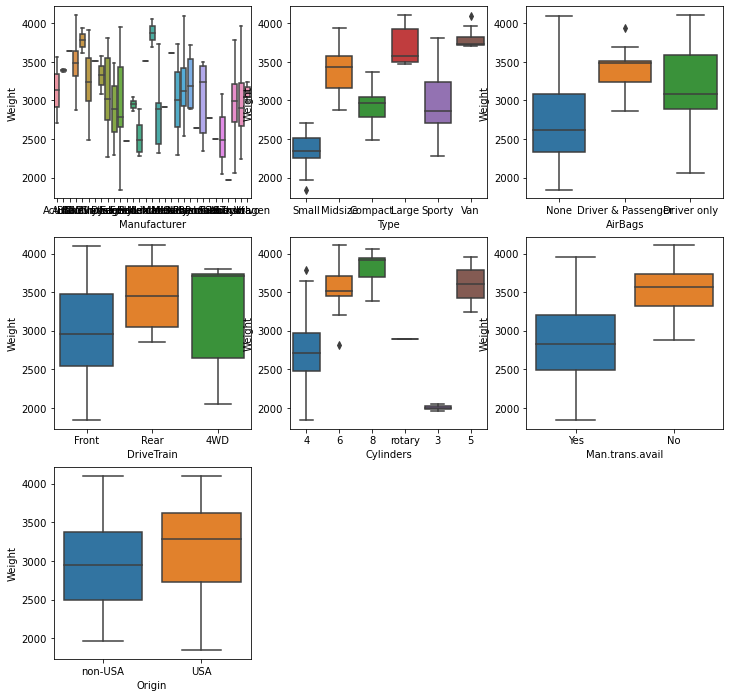

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
q = 1
import seaborn as sb
for i in cat:
    plt.subplot(3,3,q)
    sb.boxplot(X[i],Y['Weight'])
    q = q + 1

# Predictors

# Adding columns as per forward selection

# Model1

In [34]:
Y = A[["Weight"]]
X = A[["Fuel.tank.capacity"]]

In [35]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)

In [36]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error,explained_variance_score
adj = explained_variance_score(ytest,ts_pred)
bias = mean_absolute_error(ytrain,tr_pred)
var = mean_absolute_error(ytest,ts_pred)   
adj,bias,var

(0.865082348915397, 213.01226663902443, 199.60236598278718)

# model2

In [37]:
Y = A[["Weight"]]
X = A[["Fuel.tank.capacity","Width"]]
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)


from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X1,Y,test_size=0.2,random_state=21)

In [38]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error,explained_variance_score
adj = explained_variance_score(ytest,ts_pred)
bias = mean_absolute_error(ytrain,tr_pred)
var = mean_absolute_error(ytest,ts_pred)   
adj,bias,var

(0.9417341538580248, 167.49564101431713, 133.0626038362853)

# model3

In [39]:
Y = A[["Weight"]]
X = A[["Fuel.tank.capacity","Width","Type"]]

cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X2=pd.get_dummies(X[cat])
Xnew=X1.join(X2)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [40]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error,explained_variance_score
adj = explained_variance_score(ytest,ts_pred)
bias = mean_absolute_error(ytrain,tr_pred)
var = mean_absolute_error(ytest,ts_pred)   
adj,bias,var

(0.9404017961168188, 140.69126681729693, 131.5314981575727)

# model4

In [41]:
Y = A[["Weight"]]
X = A[["Fuel.tank.capacity","Width","RPM"]]
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X1,Y,test_size=0.2,random_state=21)

In [42]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error,explained_variance_score
adj = explained_variance_score(ytest,ts_pred)
bias = mean_absolute_error(ytrain,tr_pred)
var = mean_absolute_error(ytest,ts_pred)   
adj,bias,var

(0.9316958984317715, 166.12340466599116, 137.12490950803624)

# model5

In [85]:

Y = A[["Weight"]]
X = A[["Fuel.tank.capacity","Width",'MPG.city']]
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X1,Y,test_size=0.2,random_state=21)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error,explained_variance_score
adj = explained_variance_score(ytest,ts_pred)
bias = mean_absolute_error(ytrain,tr_pred)
var = mean_absolute_error(ytest,ts_pred)   
adj,bias,var

(0.9360941215252148, 149.80224669261304, 138.3872138495124)

# model6

In [44]:
B = A[['MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'Rev.per.mile',
       'Fuel.tank.capacity', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Type', 'AirBags', 'DriveTrain', 'Cylinders', 'Man.trans.avail']]
Y = A[["Weight"]]
X = A[["Fuel.tank.capacity","Width", 'MPG.highway']]
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X1,Y,test_size=0.2,random_state=21)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error,explained_variance_score
adj = explained_variance_score(ytest,ts_pred)
bias = mean_absolute_error(ytrain,tr_pred)
var = mean_absolute_error(ytest,ts_pred)   
adj,bias,var

(0.9369917848239064, 145.46378149536412, 129.52600839312944)

# model7

In [45]:
B = A[['MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'Rev.per.mile',
       'Fuel.tank.capacity', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Type', 'AirBags', 'DriveTrain', 'Cylinders', 'Man.trans.avail']]
Y = A[["Weight"]]
X = A[["Fuel.tank.capacity","Width", 'Horsepower']]
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X1,Y,test_size=0.2,random_state=21)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error,explained_variance_score
adj = explained_variance_score(ytest,ts_pred)
bias = mean_absolute_error(ytrain,tr_pred)
var = mean_absolute_error(ytest,ts_pred)   
adj,bias,var

(0.9221864067324096, 157.37430157686381, 137.7510607959166)

# model8

In [46]:
B = A[['MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'Rev.per.mile',
       'Fuel.tank.capacity', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Type', 'AirBags', 'DriveTrain', 'Cylinders', 'Man.trans.avail']]
Y = A[["Weight"]]
X = A[["Fuel.tank.capacity","Width", 'Rev.per.mile']]
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X1,Y,test_size=0.2,random_state=21)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error,explained_variance_score
adj = explained_variance_score(ytest,ts_pred)
bias = mean_absolute_error(ytrain,tr_pred)
var = mean_absolute_error(ytest,ts_pred)   
adj,bias,var

(0.9425486696993393, 166.02924428539762, 124.72152838835251)

# model9

In [47]:
B = A[['MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'Rev.per.mile',
       'Fuel.tank.capacity', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Type', 'AirBags', 'DriveTrain', 'Cylinders', 'Man.trans.avail']]
Y = A[["Weight"]]
X = A[["Fuel.tank.capacity","Width",'Rev.per.mile',  'Length']]
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)
cat
con


['Fuel.tank.capacity', 'Width', 'Rev.per.mile', 'Length']

In [48]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X1,Y,test_size=0.2,random_state=21)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error,explained_variance_score
adj = explained_variance_score(ytest,ts_pred)
bias = mean_absolute_error(ytrain,tr_pred)
var = mean_absolute_error(ytest,ts_pred)   
adj,bias,var

(0.953130569895657, 161.51713252399367, 119.22134144424632)

# model10

In [91]:
B = A[['MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'Rev.per.mile',
       'Fuel.tank.capacity', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Type', 'AirBags', 'DriveTrain', 'Cylinders', 'Man.trans.avail']]
Y = A[["Weight"]]
X = A[["Fuel.tank.capacity","Width",'Rev.per.mile',  'Length','Wheelbase']]
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)
cat
con


['Fuel.tank.capacity', 'Width', 'Rev.per.mile', 'Length', 'Wheelbase']

In [92]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X1,Y,test_size=0.2,random_state=21)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error,explained_variance_score
adj = explained_variance_score(ytest,ts_pred)
bias = mean_absolute_error(ytrain,tr_pred)
var = mean_absolute_error(ytest,ts_pred)   
adj,bias,var

(0.9744733785974582, 143.2368893780158, 92.55089266735925)

# model11

In [93]:
B = A[['MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'Rev.per.mile',
       'Fuel.tank.capacity', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Type', 'AirBags', 'DriveTrain', 'Cylinders', 'Man.trans.avail']]
Y = A[["Weight"]]
X = A[["Fuel.tank.capacity","Width",'Rev.per.mile',  'Length','Wheelbase','Turn.circle']]
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)
cat
con


['Fuel.tank.capacity',
 'Width',
 'Rev.per.mile',
 'Length',
 'Wheelbase',
 'Turn.circle']

In [94]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X1,Y,test_size=0.2,random_state=21)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error,explained_variance_score
adj = explained_variance_score(ytest,ts_pred)
bias = mean_absolute_error(ytrain,tr_pred)
var = mean_absolute_error(ytest,ts_pred)   
adj,bias,var

(0.972799754028898, 142.08827274492765, 95.41233956420155)

# model12

In [95]:
B = A[['MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'Rev.per.mile',
       'Fuel.tank.capacity', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Type', 'AirBags', 'DriveTrain', 'Cylinders', 'Man.trans.avail']]
Y = A[["Weight"]]
X = A[["Fuel.tank.capacity","Width",'Rev.per.mile',  'Length','Wheelbase','Type']]
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X2=pd.get_dummies(X[cat])
Xnew=X1.join(X2)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error,explained_variance_score
adj = explained_variance_score(ytest,ts_pred)
bias = mean_absolute_error(ytrain,tr_pred)
var = mean_absolute_error(ytest,ts_pred)   
adj,bias,var


(0.9640509561477472, 127.07905105697637, 103.09172729869975)

In [96]:
Y = A[["Weight"]]
X = A[["Fuel.tank.capacity","Width",'Rev.per.mile',  'Length','Wheelbase','AirBags']]
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X2=pd.get_dummies(X[cat])
Xnew=X1.join(X2)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error,explained_variance_score
adj = explained_variance_score(ytest,ts_pred)
bias = mean_absolute_error(ytrain,tr_pred)
var = mean_absolute_error(ytest,ts_pred)   
adj,bias,var

(0.974679536397871, 143.55454661912265, 87.6054697740032)

# model13

In [97]:
Y = A[["Weight"]]
X = A[["Fuel.tank.capacity","Width",'Rev.per.mile',  'Length','Wheelbase','AirBags','DriveTrain']]
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X2=pd.get_dummies(X[cat])
Xnew=X1.join(X2)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error,explained_variance_score
adj = explained_variance_score(ytest,ts_pred)
bias = mean_absolute_error(ytrain,tr_pred)
var = mean_absolute_error(ytest,ts_pred)   
adj,bias,var

(0.97682640125891, 143.83476205053722, 95.63992664199499)

In [98]:
Y = A[["Weight"]]
X = A[["Fuel.tank.capacity","Width",'Rev.per.mile','Length','Wheelbase','AirBags','DriveTrain','Cylinders']]
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X2=pd.get_dummies(X[cat])
Xnew=X1.join(X2)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error,explained_variance_score
adj = explained_variance_score(ytest,ts_pred)
bias = mean_absolute_error(ytrain,tr_pred)
var = mean_absolute_error(ytest,ts_pred)   
adj,bias,var

(0.9375383436084191, 128.8842215464632, 137.59092924975116)

# model14

In [100]:
Y = A[["Weight"]]
X = A[["Fuel.tank.capacity","Width",'Rev.per.mile', 'Length','Wheelbase','AirBags','DriveTrain','Man.trans.avail']]
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X2=pd.get_dummies(X[cat])
Xnew=X1.join(X2)

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error,explained_variance_score
adj = explained_variance_score(ytest,ts_pred)
bias = mean_absolute_error(ytrain,tr_pred)
var = mean_absolute_error(ytest,ts_pred)   
adj,bias,var

(0.9771030599538991, 143.90677806112365, 94.25621723587119)

# r2 good, training error 142,testing erorr less

In [58]:
A.corr()['Weight']

Min.Price             0.677071
Price                 0.689606
Max.Price             0.672457
MPG.city             -0.872984
MPG.highway          -0.821412
EngineSize            0.825492
Horsepower            0.716912
RPM                  -0.424413
Rev.per.mile         -0.710466
Fuel.tank.capacity    0.891269
Passengers            0.524746
Length                0.789172
Wheelbase             0.868891
Width                 0.873592
Turn.circle           0.773158
Rear.seat.room        0.526896
Luggage.room          0.561826
Weight                1.000000
Name: Weight, dtype: float64

In [101]:
Y = A[["Weight"]]
X=[]
B=A[['Fuel.tank.capacity', 'Width', 'Wheelbase', 'EngineSize', 'Length',
       'Turn.circle', 'Horsepower', 'Rev.per.mile', 'MPG.highway', 'MPG.city','Type', 
    'AirBags', 'DriveTrain', 'Cylinders', 'Man.trans.avail']]

adjlst=[]
biaslst=[]
varlst=[]
old_r=0
new_r=0
modelx=[[]]
for i in B.columns:
    X.append(i)
    Xdf=B[X]
    modelx.append(Xdf)
    cat=[]
    con=[]
    for i in Xdf.columns:
        if(Xdf[i].dtypes == "object"):
            if i not in cat:
                cat.append(i)
        else:
            if i not in con:
                con.append(i)
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    X1 = pd.DataFrame(ss.fit_transform(Xdf[con]),columns=con)
    if(len(cat)!=0):
        X2=pd.get_dummies(Xdf[cat])
        Xnew=X1.join(X2)

        from sklearn.model_selection import train_test_split
        xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)
    else:
        from sklearn.model_selection import train_test_split
        xtrain,xtest,ytrain,ytest=train_test_split(X1,Y,test_size=0.2,random_state=21)
    from sklearn.linear_model import LinearRegression
    lm = LinearRegression()

    model = lm.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error,explained_variance_score
    adj = explained_variance_score(ytest,ts_pred)
    bias = mean_absolute_error(ytrain,tr_pred)
    var = mean_absolute_error(ytest,ts_pred)
    new_r=adj
    if(new_r<old_r):
        X.remove(i)
    old_r=new_r
    adjlst.append(adj)
    varlst.append(var)
    biaslst.append(bias)
    
    


In [102]:
adjlst,varlst,biaslst,modelx

([0.8650823489153971,
  0.9417341538580248,
  0.9700251382342048,
  0.966762192127689,
  0.9700512542445877,
  0.9684568581505062,
  0.9680069326074559,
  0.9744733785974582,
  0.9703169215292784,
  0.9706104778510555,
  0.9598007787325015,
  0.9700004179027583,
  0.9720594011808364,
  0.9409661066888747,
  0.9729659474418185],
 [199.60236598278712,
  133.0626038362853,
  104.1116073451664,
  100.37972544936397,
  104.83915417760848,
  104.66588363310782,
  108.97547307088318,
  92.55089266735911,
  85.25128931967623,
  90.84930334111199,
  105.29335287220584,
  92.50655175921639,
  97.4722104873054,
  129.40084744089577,
  93.91621774479206],
 [213.0122666390244,
  167.49564101431713,
  145.68259022730652,
  139.59323082246945,
  145.66142501341034,
  142.58225366881055,
  133.2609979078835,
  143.2368893780158,
  123.31400837734056,
  132.8682206978581,
  120.89070512095822,
  132.62393477696165,
  128.7905672342913,
  107.89430277849604,
  129.3712529661702],
 [[],
      Fuel.tank.c

In [103]:

data = {
  "adj": adjlst,
  "bias": biaslst,
  "var":varlst
}
df = pd.DataFrame([adjlst,biaslst,varlst], index = ["adj", "bias", "var"])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
adj,0.865082,0.941734,0.970025,0.966762,0.970051,0.968457,0.968007,0.974473,0.970317,0.970610,0.959801,0.970000,0.972059,0.940966,0.972966
bias,213.012267,167.495641,145.682590,139.593231,145.661425,142.582254,133.260998,143.236889,123.314008,132.868221,120.890705,132.623935,128.790567,107.894303,129.371253
var,199.602366,133.062604,104.111607,100.379725,104.839154,104.665884,108.975473,92.550893,85.251289,90.849303,105.293353,92.506552,97.472210,129.400847,93.916218
